# DBSCAN code tutorial:
In this notebook, we will introduce DBSCAN, then compare DBSCAN to K-means and hierarchical clustering.

## Part 1: DBSCAN Intuition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

We'll make fake data to demonstrate DBSCAN's power.

In [2]:
##generate a fake dataset. 
##Note that here I intentionally made the std low so it would be a better fit to use DBSCAN as clusterin method!
X, y_true = make_blobs(n_samples=120, 
                       centers=4,
                       cluster_std=0.30, 
                       random_state=0)

print(X.shape)
print(y_true.shape)

(120, 2)
(120,)


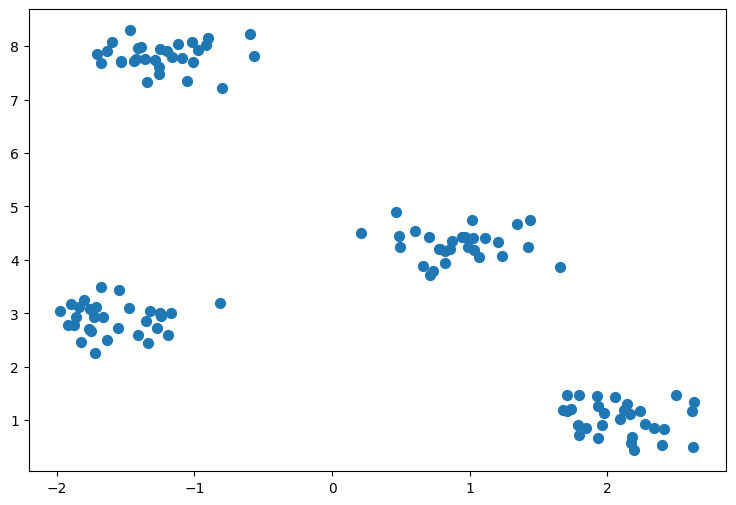

In [3]:
plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1], s=50);

Next, just like other clustering algorithms, we use fit_predict to create labels for the data. Note that DBSCAN takes eps (epsilon) and min_samples. Epsilon is the radius of the neighborhood around each point. If one point is in the neighborhood of another, they will belong to the same cluster. Min_samples controls what the minimum number of data points in a cluster can be.

In [4]:
#run DBSCAN function from sklearn package. Note that Epsilon and min=samples here are chosen arbitrarily 
#so we can test it out and adjust accordingly.
dbscan = DBSCAN(eps=0.3, min_samples=2)
clusters = dbscan.fit_predict(X)

Epsilon was chosen arbitrarily, so we are not guaranteed a good fit initially. There are ways to improve on epsilon, such as silhouette score.

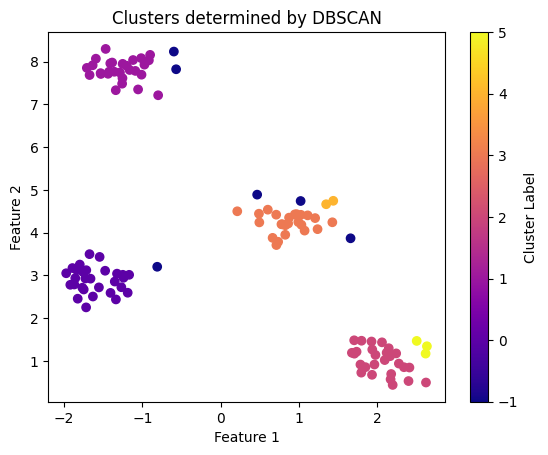

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters determined by DBSCAN')
plt.colorbar(label='Cluster Label')
plt.show()

A good fit for the data, which is well spread out in this example, is 0.7:

In [6]:
new_dbscan = DBSCAN(eps=0.7, min_samples=2)
new_clusters = new_dbscan.fit_predict(X)

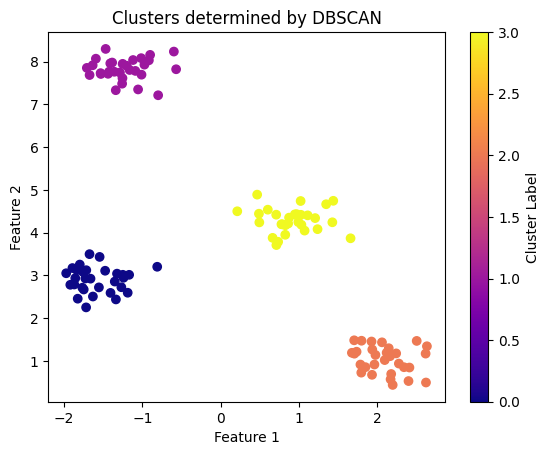

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=new_clusters, cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters determined by DBSCAN')
plt.colorbar(label='Cluster Label')
plt.show()

#### K-medoids

K-medoids is an improvement on K-means. Essentially, data points are chosen as outliers so that noise points/outliers do not affect data as much.

In [8]:
from sklearn_extra.cluster import KMedoids

X, y_true = make_blobs(n_samples=300, 
                    centers=4,
                    cluster_std=0.30, 
                    random_state=0)
kmedoids = KMedoids(n_clusters=4, random_state=0).fit(X)

In [9]:
kmedoids.cluster_centers_

array([[-1.54539193,  2.88569068],
       [ 1.96200167,  0.92688371],
       [-1.32674941,  7.78078658],
       [ 0.99622525,  4.3945289 ]])

In [10]:
kmedoids.labels_

array([1, 2, 3, 2, 1, 1, 0, 3, 2, 2, 0, 2, 3, 2, 1, 3, 3, 1, 0, 0, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 3, 2, 2, 3, 2, 2, 2, 2, 2, 0, 1, 3, 0, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 3, 2, 0, 0, 0,
       2, 1, 2, 0, 3, 0, 2, 0, 0, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3,
       2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 3, 0, 2, 1, 2, 1, 3, 1, 1, 3, 2, 3,
       0, 0, 1, 2, 1, 3, 2, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 1, 2, 0, 0, 2, 3, 2, 2, 0, 3, 0, 3, 0, 2, 3, 2, 2, 2, 3, 2, 3,
       1, 0, 2, 0, 1, 3, 2, 3, 3, 1, 3, 0, 0, 3, 1, 3, 3, 2, 1, 3, 0, 2,
       1, 1, 3, 0, 1, 3, 0, 0, 3, 3, 3, 3, 1, 2, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 2, 3, 0, 1, 0, 3, 2, 0, 2, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 1, 3,
       2, 1, 1, 0, 1, 0, 3, 2, 2, 3, 3, 2, 3, 1, 0, 3, 1, 0, 2, 0, 1, 3,
       1, 2, 2, 2, 2, 0, 0, 2, 3, 0, 1, 3, 0, 0, 0, 1, 1, 2, 3, 3, 0, 1,
       2, 0, 3, 2, 3, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1,
       2, 0, 2, 3, 1, 1, 2, 2, 2, 1, 1, 3, 2, 0])

Text(0.5, 1.0, 'Randomly Generated Clusters')

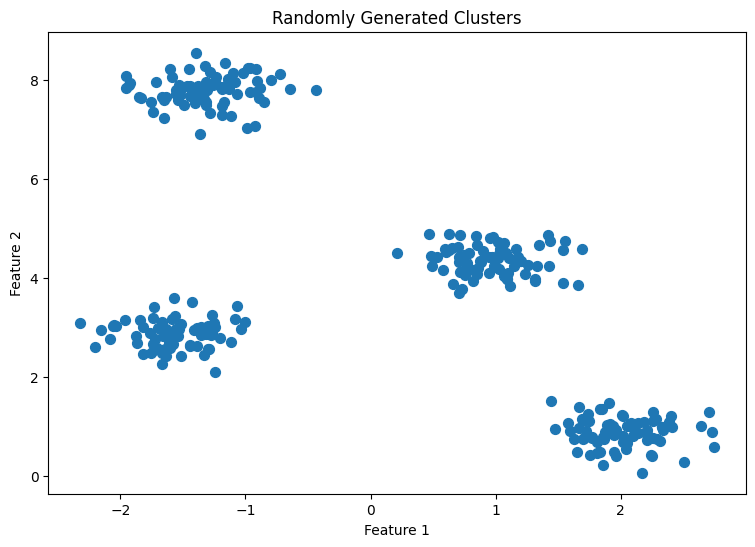

In [11]:
plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Randomly Generated Clusters')

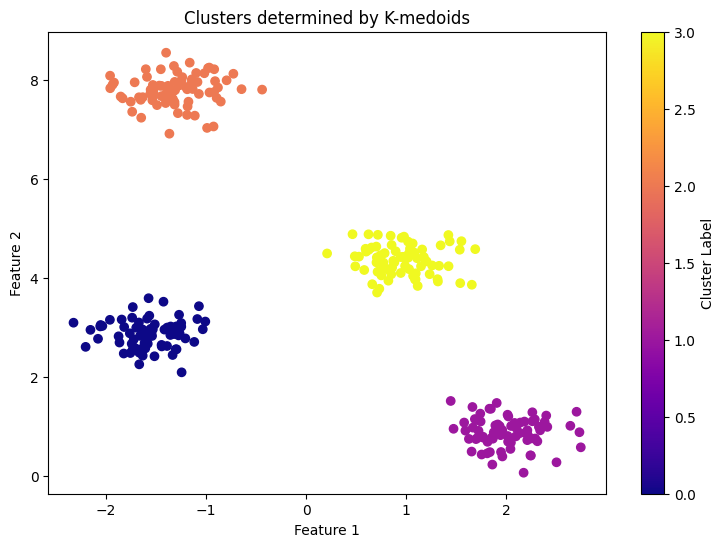

In [12]:
plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1], c=kmedoids.labels_, cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters determined by K-medoids')
plt.colorbar(label='Cluster Label')
plt.show()

#### Agglomerative

What we've seen in class with scikit-learn's Linkage function is one of many agglomerative clustering algorithms. This time, we use a more general agglomerative algorithm.

In [13]:
from sklearn.cluster import AgglomerativeClustering

X, y_true = make_blobs(n_samples=300, 
                    centers=4,
                    cluster_std=0.30, 
                    random_state=0)
Z = AgglomerativeClustering(n_clusters=4,
                            metric='euclidean')
cluster_labels = Z.fit_predict(X)

Text(0.5, 1.0, 'Randomly Generated Clusters')

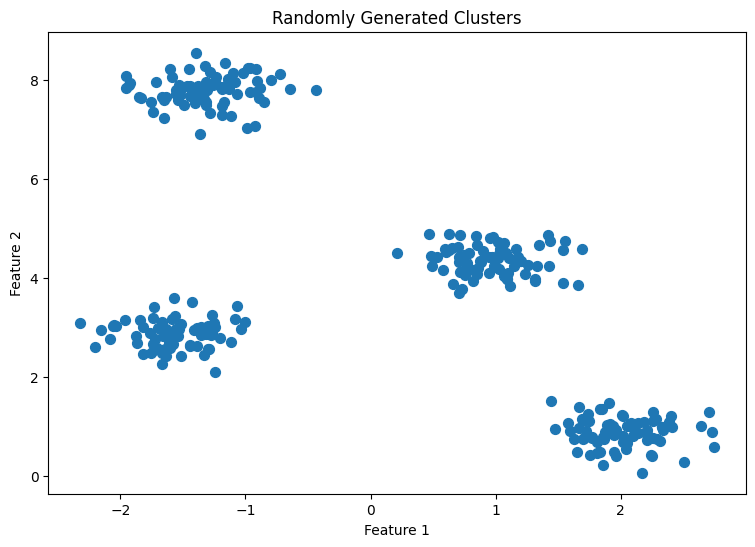

In [14]:
plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Randomly Generated Clusters')

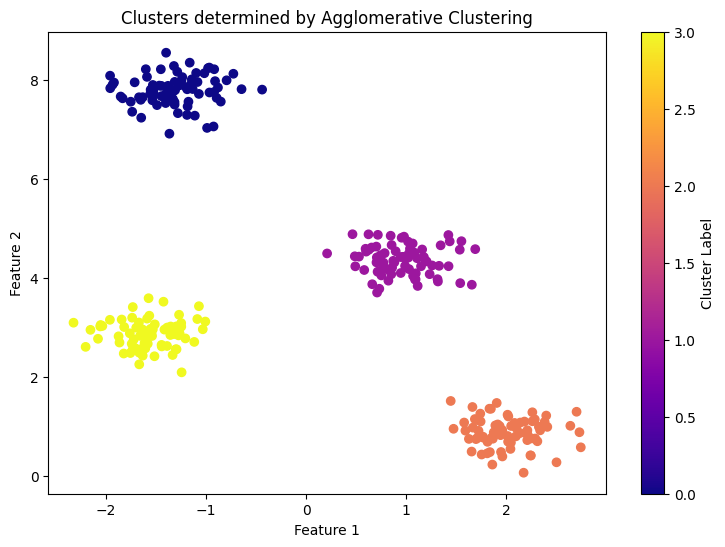

In [15]:
plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters determined by Agglomerative Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

As we have seen, all algorithms perform well on data that is clearly separated out into blobs. But what if the data isn't as easily clustered, like as follows?

Text(0.5, 1.0, 'Randomly Generated Clusters')

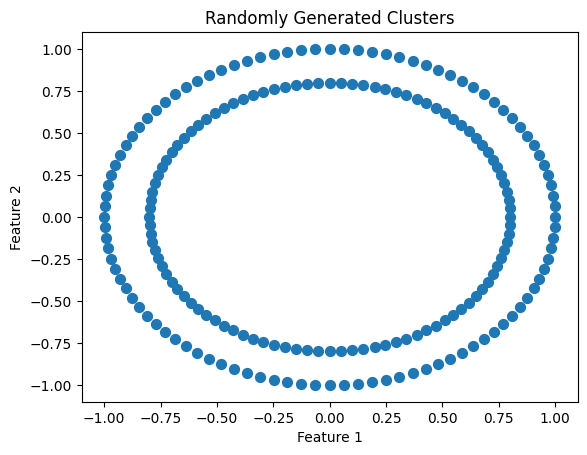

In [16]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=200, random_state=100)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Randomly Generated Clusters')

How do K-medoids and Agglo do?

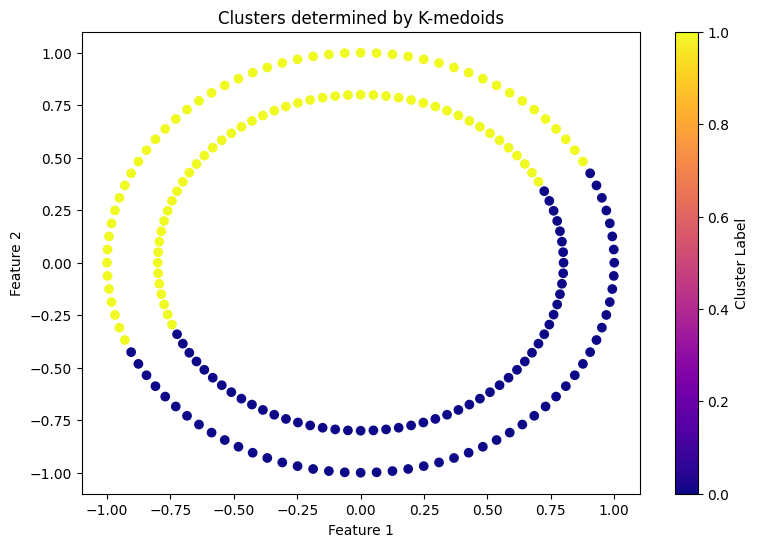

In [17]:
kmedoids = KMedoids(n_clusters=2, random_state=0).fit(X)

plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1], c=kmedoids.labels_, cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters determined by K-medoids')
plt.colorbar(label='Cluster Label')
plt.show()

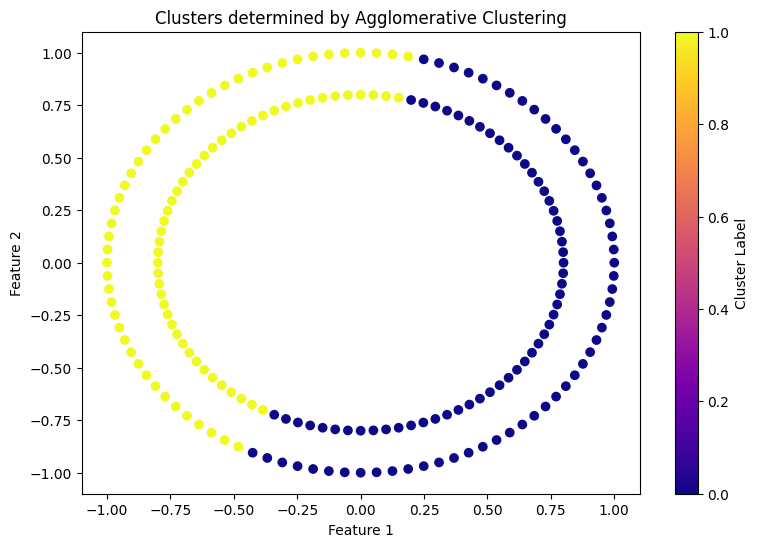

In [18]:
Z = AgglomerativeClustering(n_clusters=2,
                            metric='euclidean')
cluster_labels = Z.fit_predict(X)

plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters determined by Agglomerative Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

These clusters aren't bad... but we as humans can see there is an inner and outer circle.  This is where DBSCAN shines.

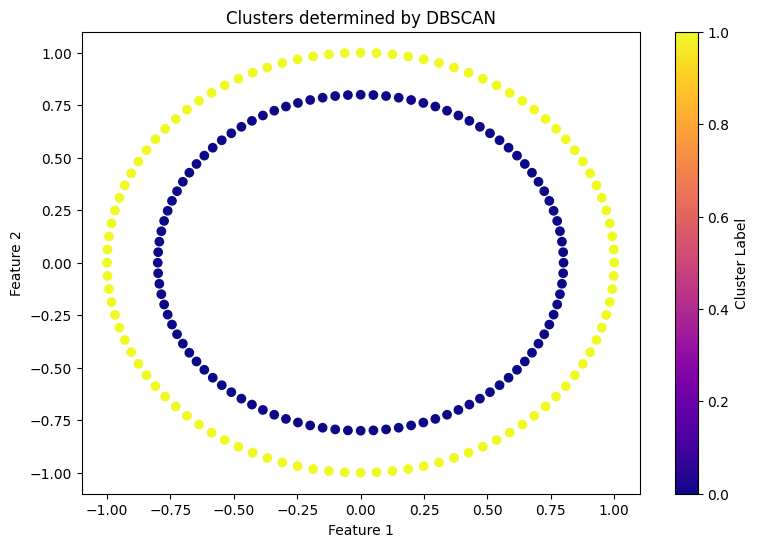

In [19]:
new_dbscan = DBSCAN(eps=0.1, min_samples=2)
new_clusters = new_dbscan.fit_predict(X)

plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1], c=new_clusters, cmap='plasma')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters determined by DBSCAN')
plt.colorbar(label='Cluster Label')
plt.show()

If we can find the right value for epsilon, which in this case is eps=0.1, we can create clusters that better match human intuition than either partitioning or hierarchical clustering can match.

## Part 2: Comparing Time and Quality of DBSCAN vs. other clustering algorithms

We can compare the time complexity of DBSCAN to algorithms we've already been introduced to using the timeit library. First we'll define the previous algorithms (k-means and hierarchical).

Next, we'll reproduce code for clustering using K-means for our time comparisons.

In [20]:
from sklearn.cluster import KMeans

# Code snippet taken from Eni's clustering walkthrough
X, y_true = make_blobs(n_samples=200, 
                       centers=4,
                       cluster_std=0.30, 
                       random_state=0)

kmeans = KMeans(n_clusters=4)  # step 1: initialize the model
kmeans.fit(X)                  # step 2: fit the data to the model
y_kmeans = kmeans.predict(X)   # step 3: prediction

Finally, we can wrap the previous algorithms into functions and compare their time complexity. We'll time them different input sizes using the timeit library.

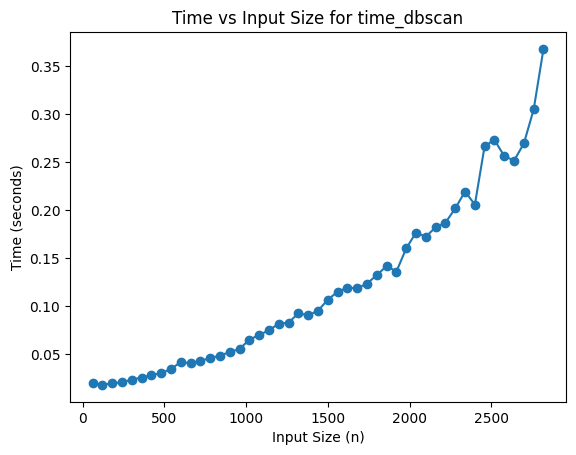

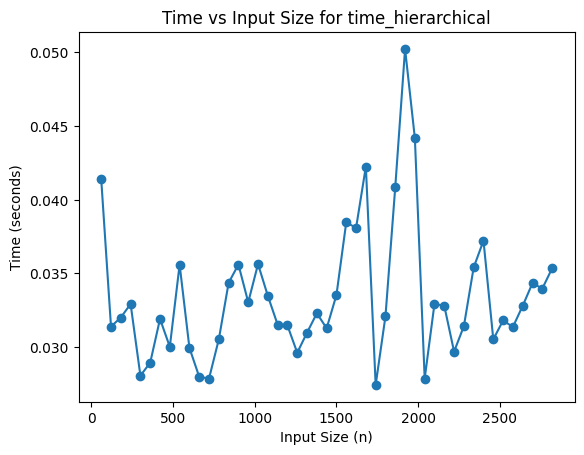

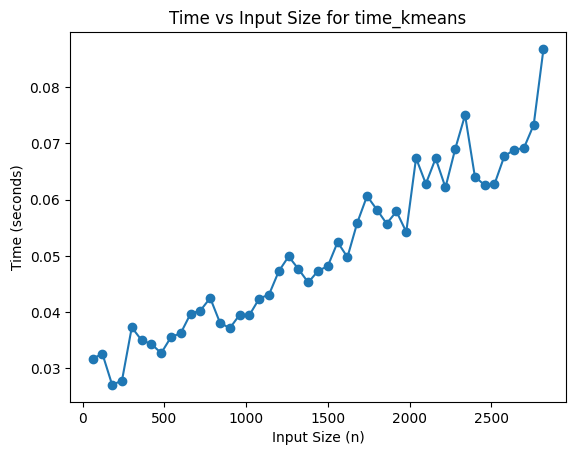

In [21]:
import timeit

def run_dbscan(n):
    X, y_true = make_blobs(n_samples=n, 
                       centers=4,
                       cluster_std=0.30, 
                       random_state=0)
    dbscan = DBSCAN(eps=0.3, min_samples=2)
    clusters = dbscan.fit_predict(X)
    return clusters

def run_k_means(n):
    X, y_true = make_blobs(n_samples=n, 
                       centers=4,
                       cluster_std=0.30, 
                       random_state=0)

    kmeans = KMeans(n_clusters=4)  # step 1: initialize the model
    kmeans.fit(X)                  # step 2: fit the data to the model
    y_kmeans = kmeans.predict(X)   # step 3: prediction
    return y_kmeans

def run_hierarchical(n, num_clusters):
    X, y_true = make_blobs(n_samples=300, 
                    centers=4,
                    cluster_std=0.30, 
                    random_state=0)
    Z = AgglomerativeClustering(n_clusters=4, # Assuming number of clusters ahead of time
                                metric='euclidean')
    cluster_labels = Z.fit_predict(X)
    return cluster_labels

# Define different input sizes
input_sizes = range(60, 2880, 60)

def time_kmeans(inputs):
    # Time the function for each input size
    times = []
    for n in input_sizes:
        time = timeit.timeit(f'run_k_means({n})', globals=globals(), number=20)
        times.append(time)
    return times

def time_hierarchical(inputs):
    # Time the function for each input size
    times = []
    for n in input_sizes:
        time = timeit.timeit(f'run_hierarchical({n}, 4)', globals=globals(), number=20)
        times.append(time)
    return times

def time_dbscan(inputs):
    # Time the function for each input size
    times = []
    for n in input_sizes:
        time = timeit.timeit(f'run_dbscan({n})', globals=globals(), number=20)
        times.append(time)
    return times

# Plotting
def plot(function, input_sizes):
    plt.plot(input_sizes, function(input_sizes), marker='o')
    plt.title(f'Time vs Input Size for {function.__name__}')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Time (seconds)')
    plt.show()
plot(time_dbscan, input_sizes)
plot(time_hierarchical, input_sizes)
plot(time_kmeans, input_sizes)

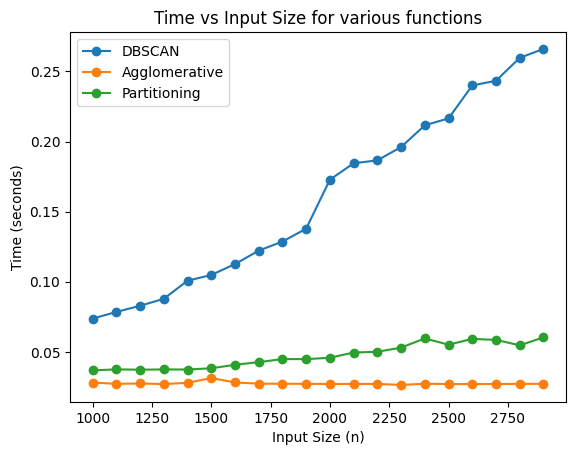

In [23]:
input_sizes = range(1000, 3000, 100)
plt.plot(input_sizes, time_dbscan(input_sizes), marker='o', label='DBSCAN')
plt.plot(input_sizes, time_hierarchical(input_sizes), marker='o',label='Agglomerative')
plt.plot(input_sizes, time_kmeans(input_sizes), marker='o',label='Partitioning')
plt.title('Time vs Input Size for various functions')
plt.legend()
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.show()

Time complexity-wise, DBSCAN takes significantly longer for datasets of these sizes.

In principle, we'd want to use the elbow method to determine the best value for K in k-means, and the best value for epsilon in DBSCAN's case. Let's do that and see how it affects runtime.

This is the code for sweeping values of epsilon:

In [24]:
from sklearn.metrics import silhouette_score
def sweep_epsilons(X):
    scores = []
    for eps in list(np.arange(0.01, 0.05, 0.01)) + list(np.arange(0.1, 0.5, 0.1)):
        model = DBSCAN(eps=eps, min_samples=3, metric='cosine')
        labels = model.fit_predict(X)
        if len(set(labels)) > 1:  # More than 1 cluster plus noise must be present to calculate silhouette
            score = silhouette_score(X, labels)
            scores.append((eps, score))
    return max(scores, key=lambda x: x[1])[0]

def run_dbscan(n):
    X, y_true = make_blobs(n_samples=n, 
                       centers=4,
                       cluster_std=0.30, 
                       random_state=0)
    e = sweep_epsilons(X)
    # print(e)
    dbscan = DBSCAN(eps=e, min_samples=2)
    clusters = dbscan.fit_predict(X)
    return clusters

def time_dbscan(input_sizes):
    # Time the function for each input size
    times = []
    for n in input_sizes:
        time = timeit.timeit(f'run_dbscan({n})', globals=globals(), number=20)
        times.append(time)
    return times

And this is code for using the elbow method, then finding the point of inflection at that point:

In [25]:
def elbow_method(X):
    # Calculate WCSS for different values of k
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Compute the second derivative of the curve
    second_derivative = np.diff(np.diff(wcss))

    # Find the index corresponding to the maximum second derivative
    elbow_point_index = np.argmax(second_derivative) + 1  # Adding 1 to account for the first diff
    return elbow_point_index

def run_k_means(n):
    X, y_true = make_blobs(n_samples=n, 
                       centers=4,
                       cluster_std=0.30, 
                       random_state=0)
    k = elbow_method(X)
    # print(k)
    kmeans = KMeans(n_clusters=k)  # step 1: initialize the model
    kmeans.fit(X)                  # step 2: fit the data to the model
    y_kmeans = kmeans.predict(X)   # step 3: prediction
    return y_kmeans

def time_kmeans(input_sizes):
    # Time the function for each input size
    times = []
    for n in input_sizes:
        time = timeit.timeit(f'run_k_means({n})', globals=globals(), number=20)
        times.append(time)
    return times

Now we can compare them again:

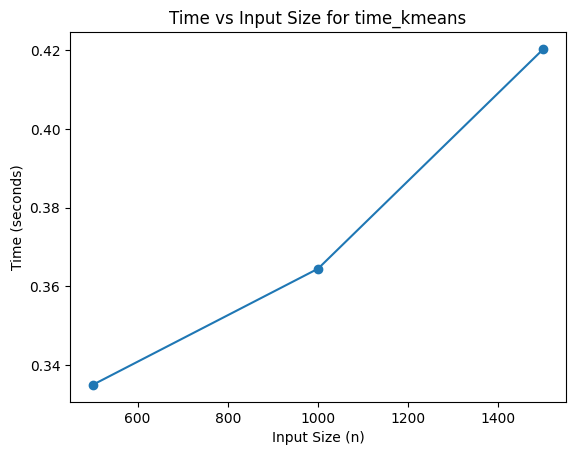

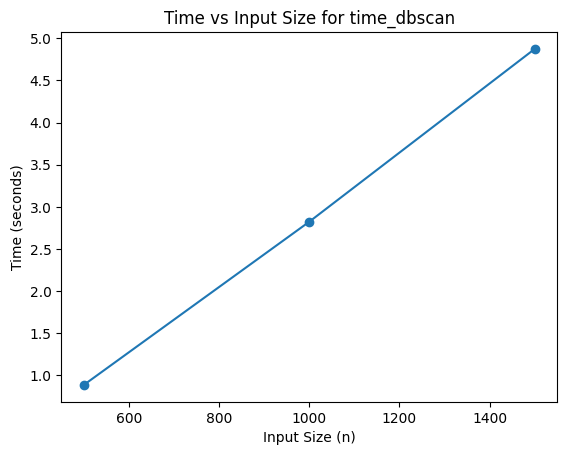

In [26]:
input_sizes = [500, 1000, 1500]
plot(time_kmeans, input_sizes)
plot(time_dbscan, input_sizes)

DBScan clearly takes longer. Not many input sizes were used as these updated functions take a long time to run. However, this result is expected since [literature verifies this result](https://hdbscan.readthedocs.io/en/latest/performance_and_scalability.html). Hierarchical clustering worked the fastest of the three, but note that it is not as useful when we do not know the number of clusters we want to use ahead of time, as we did in the case where we timed it. In general, hierarchical clustering would be less useful than either K-means or DBSCAN in larger datasets.

DBSCAN has the advantage of working well with noisy datasets. Thus it may perform better in practice against K-means and Agglomerative than in the make_blobs scenario where the data is not very noisy.